In [1]:
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import sparse

import pickle

from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

In [2]:
from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

In [3]:
from recommender import plot_cm, print_results, IO
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise

In [4]:
%%time
# Load data

fig_dir = 'figs/modeling/Las_Vegas/'

data_dir = 'data/Las_Vegas/'
dfb = pd.read_pickle(data_dir + 'business.pkl')
dfr = pd.read_pickle(data_dir + 'review.pkl')
dfu = pd.read_pickle(data_dir + 'user.pkl')
datar = pd.read_pickle(data_dir + 'data_review.pkl')

Wall time: 2.72 s


In [5]:
print(dfb.shape)
print(dfu.shape)
print(datar.shape)
datar.head()

(20434, 93)
(429363, 22)
(1280896, 3)


,user_id,business_id,stars
0,70,6,5
1,71,6,5
2,72,6,5
3,73,6,5
4,74,6,5


In [6]:
# Split the dataset into a training set a test set

X_train, X_test, y_train, y_test = train_test_split(datar[['user_id', 'business_id']].values, datar['stars'].values, \
                                                   test_size=0.5, random_state=0)

In [7]:
models = [ModeClassifier(), RS_surprise(NormalPredictor()), BaselineMean(), BaselineRegression(), \
          RS_surprise(BaselineOnly()), RS_surprise(KNNBasic()), RS_surprise(KNNWithMeans()), RS_surprise(KNNBaseline()), \
          ALS2(), RS_surprise(SVD()), RS_surprise(SVDpp()), RS_surprise(NMF()), RS_surprise(SlopeOne()), \
          RS_surprise(CoClustering())]
model_names = ['Mode estimator', 'Normal predictor*', 'Baseline (mean)', 'Baseline (regression)', \
              'Baseline (ALS)*', 'KNN (basic)*', 'KNN (with means)*', 'KNN (baseline)*', \
              'SVD-ALS', 'SVD-SGD*', 'SVD++-SGD*', 'NMF-SGD*', 'Slope one*', 'Co-clustering*']
fignames = [fig_dir + str(i) + 'cm.png' for i in range(len(models))]

In [8]:
%%time

estimators = []
is_successful = []

for i, model in enumerate(models):
    try:
        model.fit(X_train, y_train)
        estimators.append(model)
        IO(data_dir + 'results/estimators.pkl').to_pickle(estimators)
        print(model_names[i] + ' successful.')
        is_successful.append(True)
    except:
        print(model_names[i] + ' failed.')
        is_successful.append(False)
        
IO(data_dir + 'results/is_successful.pkl').to_pickle(is_successful)

Mode estimator successful.
Normal predictor* successful.
Baseline (mean) successful.
Baseline (regression) successful.
Estimating biases using als...
Baseline (ALS)* successful.
Computing the msd similarity matrix...
KNN (basic)* failed.
Computing the msd similarity matrix...
KNN (with means)* failed.
Estimating biases using als...
Computing the msd similarity matrix...
KNN (baseline)* failed.
SVD-ALS successful.
SVD-SGD* successful.
SVD++-SGD* successful.
NMF-SGD* successful.
Slope one* successful.
Co-clustering* successful.
Wall time: 30min 53s


Mode estimator
Fitting time: 0.0 s.
RMSE on training set: 1.9056622316195715.
RMSE on test set: 1.908047509442885.
Classification accuracy on training set: 0.4427322749075647.
Classification accuracy on test set: 0.4418001149195563.


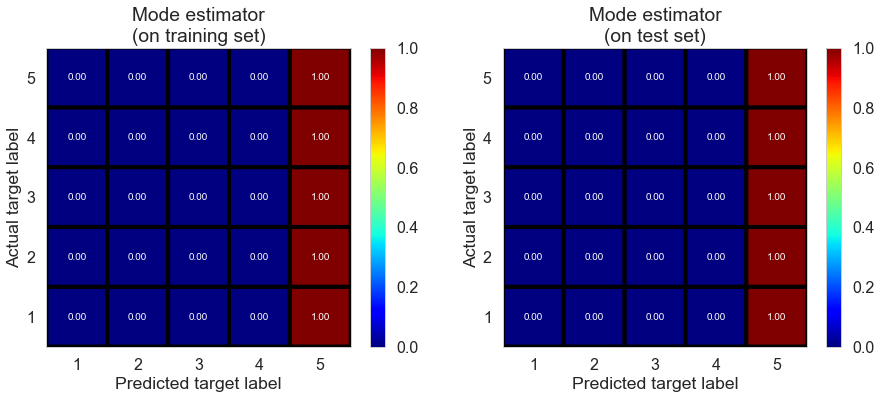


Normal predictor*
Fitting time: 3.447197198867798 s.
RMSE on training set: 1.85731123682942.
RMSE on test set: 1.8547142681936435.
Classification accuracy on training set: 0.24007257419806136.
Classification accuracy on test set: 0.2399008194264015.


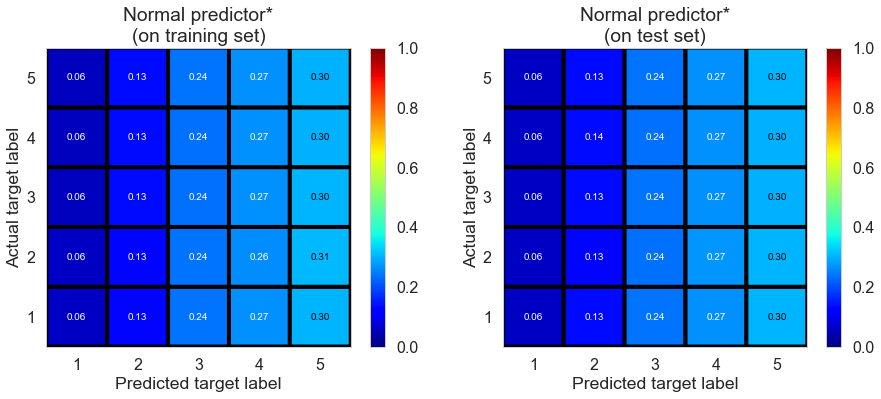


Baseline (mean)
Fitting time: 0.9370534420013428 s.
RMSE on training set: 0.9867135891914859.
RMSE on test set: 1.4248036723285245.
Classification accuracy on training set: 0.5687112771060258.
Classification accuracy on test set: 0.3530918981712801.


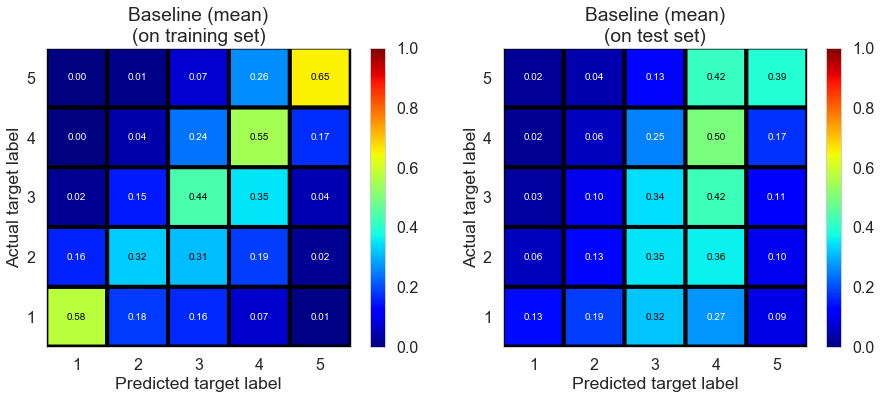


Baseline (regression)
Fitting time: 6.10534930229187 s.
RMSE on training set: 0.911358260777607.
RMSE on test set: 1.2918026816998092.
Classification accuracy on training set: 0.45006932647146997.
Classification accuracy on test set: 0.3204038423103827.


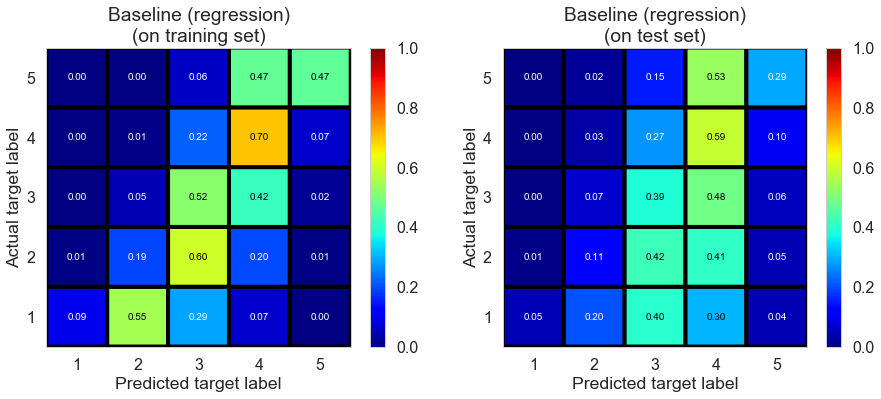


Baseline (ALS)*
Fitting time: 5.72332763671875 s.
RMSE on training set: 1.1889684404281102.
RMSE on test set: 1.2760514269874317.
Classification accuracy on training set: 0.2836561282102528.
Classification accuracy on test set: 0.2664665983811332.


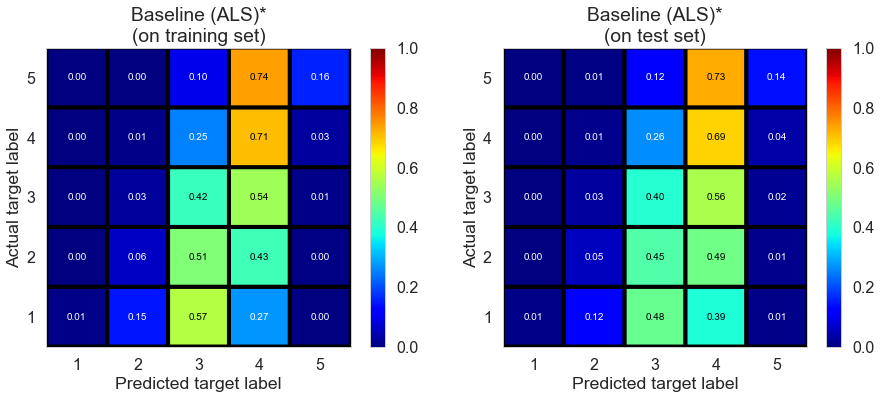


SVD-ALS
Fitting time: 71.5680935382843 s.
RMSE on training set: 0.3860551794865493.
RMSE on test set: 1.4999771055886078.
Classification accuracy on training set: 0.8623073223743379.
Classification accuracy on test set: 0.2582005096432497.


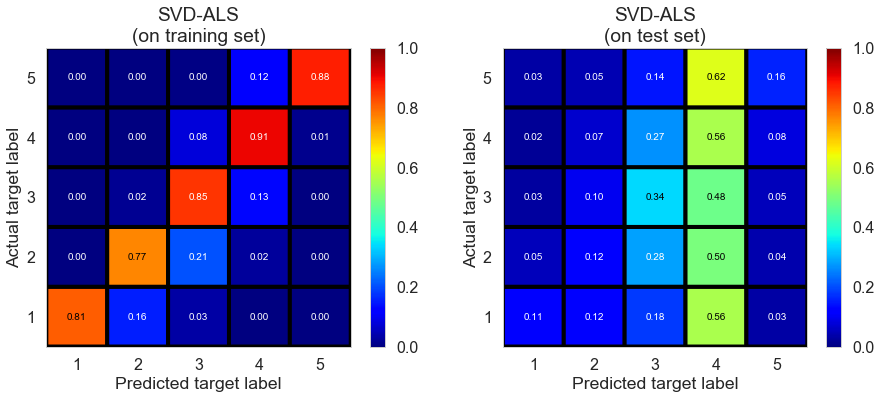


SVD-SGD*
Fitting time: 22.833306074142456 s.
RMSE on training set: 0.3857305200914244.
RMSE on test set: 1.5255228986003821.
Classification accuracy on training set: 0.8553309558309183.
Classification accuracy on test set: 0.2934164834615769.


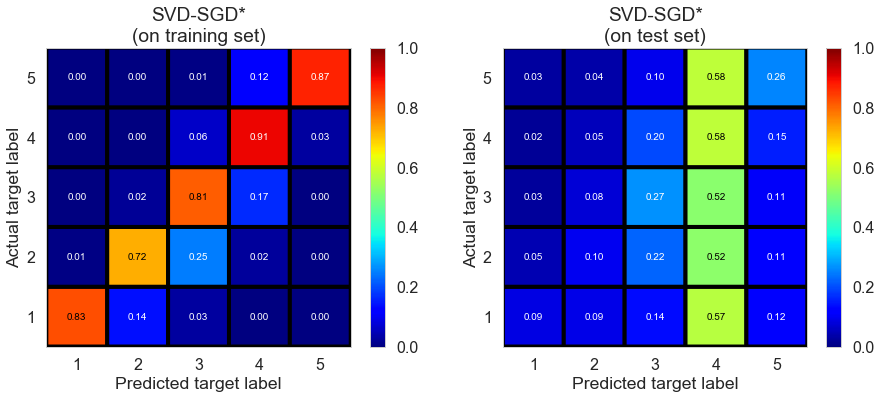


SVD++-SGD*
Fitting time: 68.28590559959412 s.
RMSE on training set: 0.8659801075842516.
RMSE on test set: 1.4539721464337472.
Classification accuracy on training set: 0.5748819576296592.
Classification accuracy on test set: 0.3169593784350954.


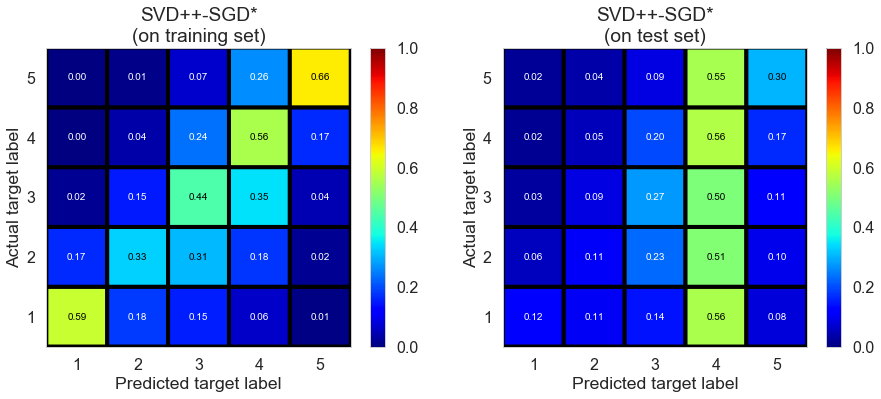


Wall time: 5min 5s


In [9]:
%%time

#estimators = IO(data_dir + 'results/estimators.pkl').read_pickle()

for i in range(len(estimators)):
    if is_successful[i]:
        print_results(estimators[i], model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                      figname=fignames[i])